## Setup Plotting Style and Imports

In [40]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


plt.style.use('default')
sns.set_palette("husl")


print("Plotting style and libraries initialized successfully.")

Plotting style and libraries initialized successfully.


In [41]:
try:
    credit_scores = pd.read_parquet('model_export_parquetFile\credit_scores_1.parquet')
    wallet_features = pd.read_parquet('model_export_parquetFile\wallet_features_1.parquet')
    print("DataFrames loaded successfully from 'credit_scores.parquet' and 'wallet_features.parquet'.")
except FileNotFoundError:
    print("Error: Parquet files not found. Ensure 'credit_scores.parquet' and 'wallet_features.parquet' are in the same directory.")
except ImportError:
    print("Error: Install 'pyarrow' or 'fastparquet' to read Parquet files. Run 'pip install pyarrow'.")


print(f"\ncredit_scores shape: {credit_scores.shape}")
print(f"wallet_features shape: {wallet_features.shape}")

DataFrames loaded successfully from 'credit_scores.parquet' and 'wallet_features.parquet'.

credit_scores shape: (3497, 9)
wallet_features shape: (3497, 18)


## Overall Score Statistics

In [42]:

def calculate_score_stats(credit_scores):
    """
    Calculate basic statistics for credit scores
    """
    print("=== CREDIT SCORE DISTRIBUTION ANALYSIS ===\n")
    print("1. OVERALL SCORE STATISTICS:")
    print(f"Total Wallets Analyzed: {len(credit_scores):,}")
    print(f"Mean Score: {credit_scores['credit_score'].mean():.2f}")
    print(f"Median Score: {credit_scores['credit_score'].median():.2f}")
    print(f"Standard Deviation: {credit_scores['credit_score'].std():.2f}")
    print(f"Min Score: {credit_scores['credit_score'].min():.2f}")
    print(f"Max Score: {credit_scores['credit_score'].max():.2f}")
    print()


calculate_score_stats(credit_scores)

=== CREDIT SCORE DISTRIBUTION ANALYSIS ===

1. OVERALL SCORE STATISTICS:
Total Wallets Analyzed: 3,497
Mean Score: 554.24
Median Score: 553.14
Standard Deviation: 70.52
Min Score: 324.89
Max Score: 652.97



## Score Range Distribution

2. SCORE RANGE DISTRIBUTION:
    0-100:      0 wallets (  0.0%)
  100-200:      0 wallets (  0.0%)
  200-300:      0 wallets (  0.0%)
  300-400:     61 wallets (  1.7%)
  400-500:    745 wallets ( 21.3%)
  500-600:  1,415 wallets ( 40.5%)
  600-700:  1,276 wallets ( 36.5%)
  700-800:      0 wallets (  0.0%)
  800-900:      0 wallets (  0.0%)
  900-1000:      0 wallets (  0.0%)


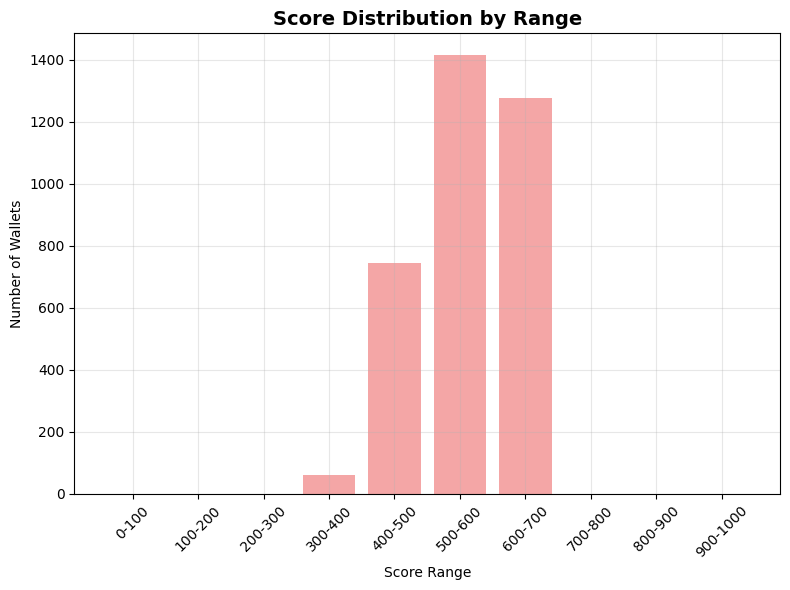

In [43]:

def score_range_distribution(credit_scores):
    """
    Calculate distribution of scores across predefined ranges
    """
    ranges = [(0, 100), (100, 200), (200, 300), (300, 400), (400, 500), 
              (500, 600), (600, 700), (700, 800), (800, 900), (900, 1000)]
    
    range_stats = []
    print("2. SCORE RANGE DISTRIBUTION:")
    for low, high in ranges:
        count = len(credit_scores[(credit_scores['credit_score'] >= low) & 
                                 (credit_scores['credit_score'] < high)])
        percentage = (count / len(credit_scores)) * 100
        range_stats.append({
            'Range': f"{low}-{high}",
            'Count': count,
            'Percentage': percentage
        })
        print(f"  {low:3d}-{high:3d}: {count:6,} wallets ({percentage:5.1f}%)")
    
   
    range_df = pd.DataFrame(range_stats)
    plt.figure(figsize=(8, 6))
    plt.bar(range_df['Range'], range_df['Count'], color='lightcoral', alpha=0.7)
    plt.title('Score Distribution by Range', fontsize=14, fontweight='bold')
    plt.xlabel('Score Range')
    plt.ylabel('Number of Wallets')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return range_stats


range_stats = score_range_distribution(credit_scores)

## Quality Category Distribution

3. QUALITY CATEGORY DISTRIBUTION:
  Excellent (800-1000):      0 wallets (  0.0%)
  Good (600-799):  1,276 wallets ( 36.5%)
  Average (400-599):  2,160 wallets ( 61.8%)
  Below Average (200-399):     61 wallets (  1.7%)
  Poor (0-199):      0 wallets (  0.0%)


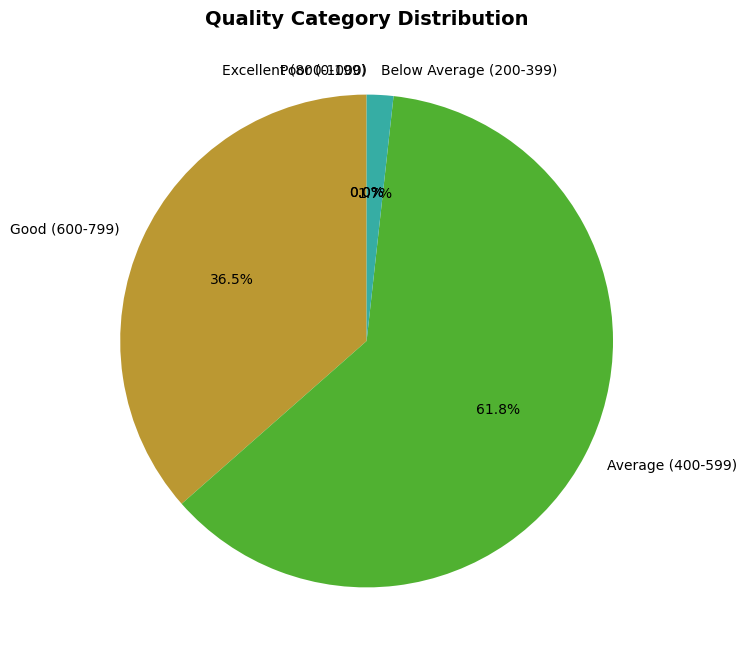

In [44]:

def quality_category_distribution(credit_scores):
    """
    Calculate distribution across quality categories
    """
    categories = {
        'Excellent (800-1000)': len(credit_scores[credit_scores['credit_score'] >= 800]),
        'Good (600-799)': len(credit_scores[(credit_scores['credit_score'] >= 600) & 
                                           (credit_scores['credit_score'] < 800)]),
        'Average (400-599)': len(credit_scores[(credit_scores['credit_score'] >= 400) & 
                                              (credit_scores['credit_score'] < 600)]),
        'Below Average (200-399)': len(credit_scores[(credit_scores['credit_score'] >= 200) & 
                                                    (credit_scores['credit_score'] < 400)]),
        'Poor (0-199)': len(credit_scores[credit_scores['credit_score'] < 200])
    }
    
    print("3. QUALITY CATEGORY DISTRIBUTION:")
    for category, count in categories.items():
        percentage = (count / len(credit_scores)) * 100
        print(f"  {category}: {count:6,} wallets ({percentage:5.1f}%)")
    
    # Visualize as pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(categories.values(), labels=categories.keys(), autopct='%1.1f%%', startangle=90)
    plt.title('Quality Category Distribution', fontsize=14, fontweight='bold')
    plt.show()
    
    return categories


categories = quality_category_distribution(credit_scores)

## Score Distribution Histogram

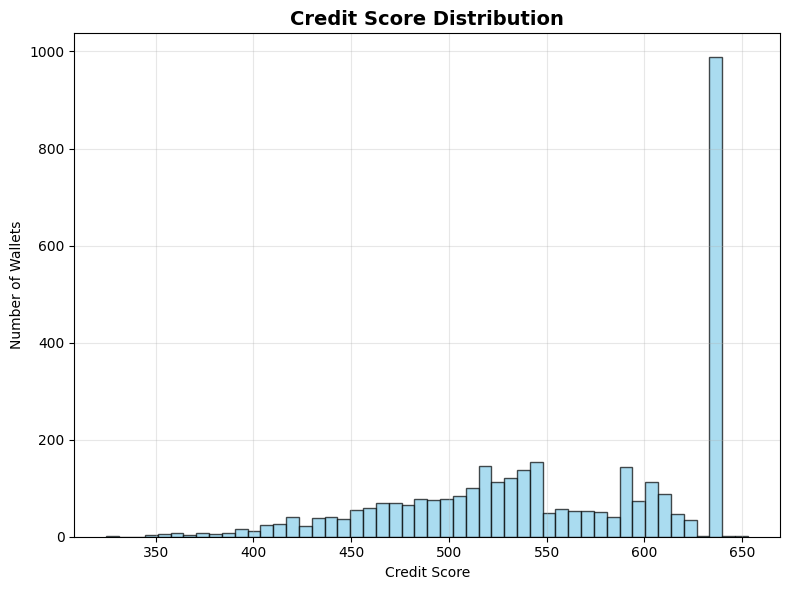

In [45]:

def plot_score_histogram(credit_scores):
    """
    Plot histogram of credit score distribution
    """
    plt.figure(figsize=(8, 6))
    plt.hist(credit_scores['credit_score'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Credit Score Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Credit Score')
    plt.ylabel('Number of Wallets')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


plot_score_histogram(credit_scores)

## Component Score Correlation

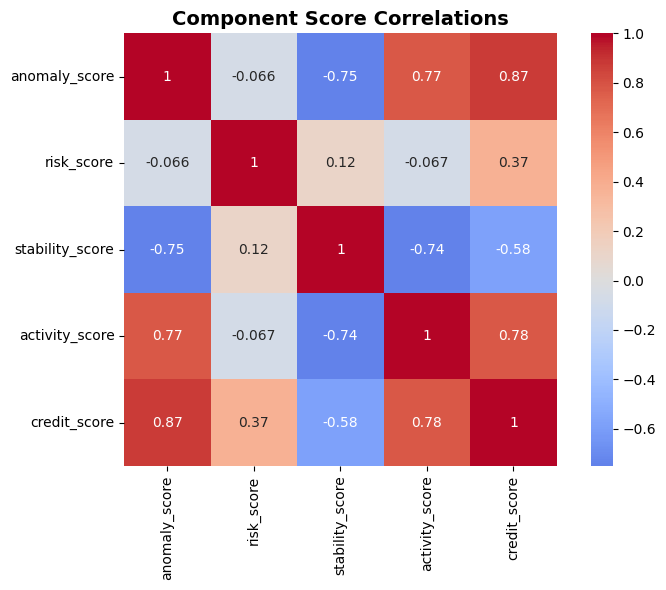

In [46]:

def plot_component_correlations(credit_scores):
    """
    Plot correlation matrix of component scores
    """
    component_cols = ['anomaly_score', 'risk_score', 'stability_score', 'activity_score']
    if all(col in credit_scores.columns for col in component_cols):
        correlation_matrix = credit_scores[component_cols + ['credit_score']].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
        plt.title('Component Score Correlations', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    else:
        print("Not all component columns available for correlation analysis.")


plot_component_correlations(credit_scores)

## Behavioral Metrics by Score Range

In [47]:

def analyze_behavioral_metrics(credit_scores, wallet_features):
    """
    Analyze key behavioral metrics by score range
    """

    analysis_df = wallet_features.merge(credit_scores[['userWallet', 'credit_score']], 
                                       on='userWallet', how='inner')
    
    
    analysis_df['score_range'] = pd.cut(analysis_df['credit_score'], 
                                       bins=[0, 200, 400, 600, 800, 1000],
                                       labels=['Poor (0-199)', 'Below Avg (200-399)', 
                                              'Average (400-599)', 'Good (600-799)', 
                                              'Excellent (800-1000)'])
    

    behavioral_metrics = ['total_txns', 'days_active', 'txns_per_day', 'num_liquidations', 
                         'liq_ratio', 'repay_freq', 'account_age_days', 'unique_assets']
    existing_metrics = [col for col in behavioral_metrics if col in analysis_df.columns]
    
    print("4. BEHAVIORAL METRICS BY SCORE RANGE:")
    for metric in existing_metrics:
        print(f"\n{metric.upper()}:")
        metric_by_range = analysis_df.groupby('score_range')[metric].agg(['mean', 'median', 'std']).round(2)
        print(metric_by_range)
    
    return analysis_df


analysis_df = analyze_behavioral_metrics(credit_scores, wallet_features)

4. BEHAVIORAL METRICS BY SCORE RANGE:

TOTAL_TXNS:
                        mean  median      std
score_range                                  
Poor (0-199)             NaN     NaN      NaN
Below Avg (200-399)   374.52    28.0  1823.26
Average (400-599)      34.19     8.0    74.63
Good (600-799)          2.59     1.0     7.39
Excellent (800-1000)     NaN     NaN      NaN

DAYS_ACTIVE:
                       mean  median    std
score_range                               
Poor (0-199)            NaN     NaN    NaN
Below Avg (200-399)   66.82    69.0  41.33
Average (400-599)     33.08    18.0  36.19
Good (600-799)         3.50     1.0  10.16
Excellent (800-1000)    NaN     NaN    NaN

TXNS_PER_DAY:
                      mean  median    std
score_range                              
Poor (0-199)           NaN     NaN    NaN
Below Avg (200-399)   8.17     0.7  29.17
Average (400-599)     1.80     1.0   2.51
Good (600-799)        0.98     1.0   0.49
Excellent (800-1000)   NaN     NaN    NaN

NU

C:\Users\nikk6\AppData\Local\Temp\ipykernel_9344\3352361933.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metric_by_range = analysis_df.groupby('score_range')[metric].agg(['mean', 'median', 'std']).round(2)
C:\Users\nikk6\AppData\Local\Temp\ipykernel_9344\3352361933.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metric_by_range = analysis_df.groupby('score_range')[metric].agg(['mean', 'median', 'std']).round(2)
C:\Users\nikk6\AppData\Local\Temp\ipykernel_9344\3352361933.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pas

## High and Low Scoring Wallet Characteristics

In [48]:

def analyze_high_low_wallets(analysis_df):
    """
    Analyze characteristics of high and low scoring wallets
    """
   
    print("\n5. HIGH-SCORING WALLET CHARACTERISTICS (800-1000):")
    high_score_wallets = analysis_df[analysis_df['credit_score'] >= 800]
    if len(high_score_wallets) > 0:
        print(f"  Number of high-scoring wallets: {len(high_score_wallets)}")
        print(f"  Average total transactions: {high_score_wallets['total_txns'].mean():.1f}")
        if 'account_age_days' in high_score_wallets.columns:
            print(f"  Average account age: {high_score_wallets['account_age_days'].mean():.1f} days")
        if 'unique_assets' in high_score_wallets.columns:
            print(f"  Average unique assets: {high_score_wallets['unique_assets'].mean():.1f}")
        if 'liq_ratio' in high_score_wallets.columns:
            print(f"  Average liquidation ratio: {high_score_wallets['liq_ratio'].mean():.4f}")
    else:
        print("  No wallets found in this range")
    
   
    print("\n6. LOW-SCORING WALLET CHARACTERISTICS (0-199):")
    low_score_wallets = analysis_df[analysis_df['credit_score'] < 200]
    if len(low_score_wallets) > 0:
        print(f"  Number of low-scoring wallets: {len(low_score_wallets)}")
        print(f"  Average total transactions: {low_score_wallets['total_txns'].mean():.1f}")
        if 'account_age_days' in low_score_wallets.columns:
            print(f"  Average account age: {low_score_wallets['account_age_days'].mean():.1f} days")
        if 'unique_assets' in low_score_wallets.columns:
            print(f"  Average unique assets: {low_score_wallets['unique_assets'].mean():.1f}")
        if 'liq_ratio' in low_score_wallets.columns:
            print(f"  Average liquidation ratio: {low_score_wallets['liq_ratio'].mean():.4f}")
    else:
        print("  No wallets found in this range")


analyze_high_low_wallets(analysis_df)


5. HIGH-SCORING WALLET CHARACTERISTICS (800-1000):
  No wallets found in this range

6. LOW-SCORING WALLET CHARACTERISTICS (0-199):
  No wallets found in this range


## Behavioral Metrics Visualization

C:\Users\nikk6\AppData\Local\Temp\ipykernel_9344\1482494426.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metric_data = analysis_df.groupby('score_range')[metric].mean()
C:\Users\nikk6\AppData\Local\Temp\ipykernel_9344\1482494426.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metric_data = analysis_df.groupby('score_range')[metric].mean()
C:\Users\nikk6\AppData\Local\Temp\ipykernel_9344\1482494426.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the 

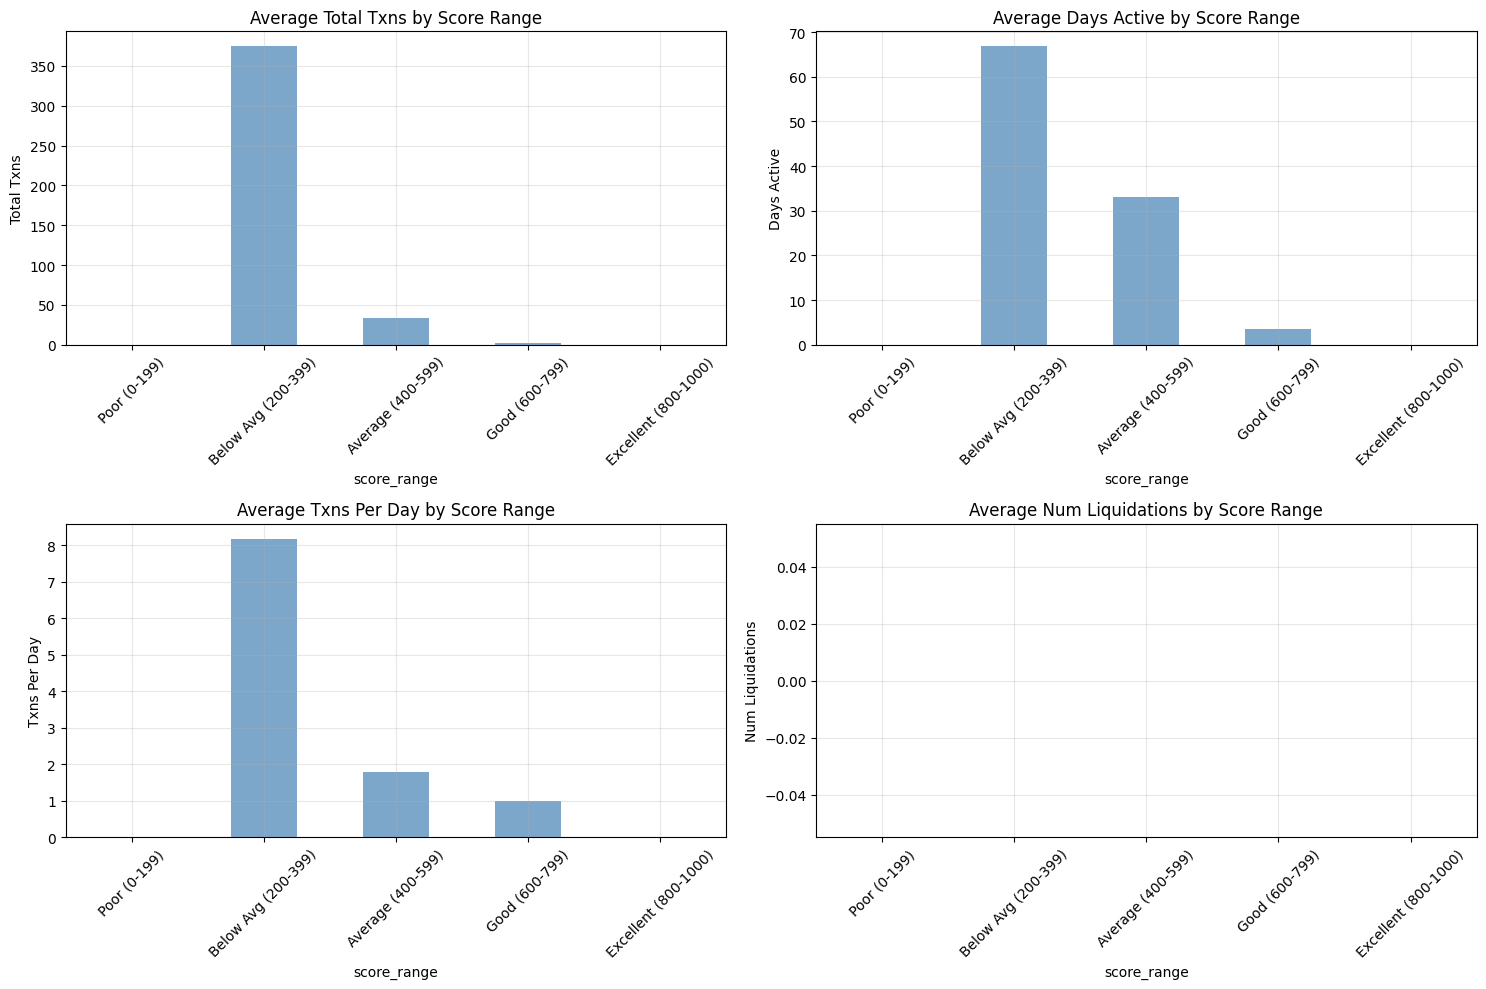

In [49]:

def visualize_behavioral_metrics(analysis_df):
    """
    Visualize behavioral metrics by score range
    """
    behavioral_metrics = ['total_txns', 'days_active', 'txns_per_day', 'num_liquidations']
    existing_metrics = [col for col in behavioral_metrics if col in analysis_df.columns]
    
    if len(existing_metrics) >= 1:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.flatten()
        
        for i, metric in enumerate(existing_metrics[:4]):
            if i < 4:
                metric_data = analysis_df.groupby('score_range')[metric].mean()
                metric_data.plot(kind='bar', ax=axes[i], color='steelblue', alpha=0.7)
                axes[i].set_title(f'Average {metric.replace("_", " ").title()} by Score Range')
                axes[i].set_ylabel(metric.replace("_", " ").title())
                axes[i].tick_params(axis='x', rotation=45)
                axes[i].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No behavioral metrics available for visualization.")


visualize_behavioral_metrics(analysis_df)

## Cluster Analysis and Visualization

7. CLUSTER CHARACTERISTICS:
           credit_score                        anomaly_score risk_score  \
                  count    mean  median    std          mean       mean   
cluster_id                                                                
0                  1066  507.11  514.49  55.92         54.10      76.21   
1                  1752  601.88  633.50  48.11         90.13      74.25   
2                   320  475.73  478.43  49.09         46.47      73.96   
3                     1  363.46  363.46    NaN          0.00      75.00   
4                   358  532.12  540.38  44.54         65.71      74.61   

           stability_score activity_score  
                      mean           mean  
cluster_id                                 
0                    19.44           2.88  
1                     4.83          29.43  
2                    17.80           1.40  
3                    19.23           0.00  
4                     7.65          19.14  


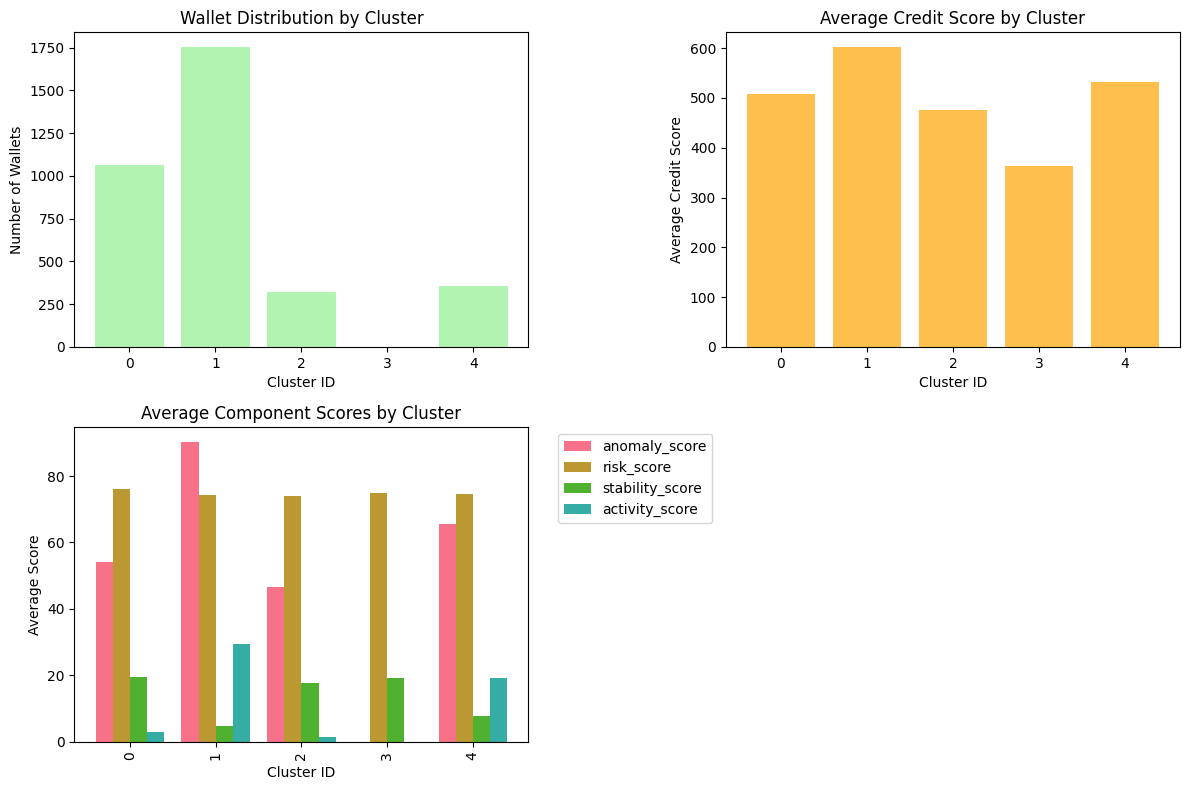

In [50]:

def generate_cluster_analysis(credit_scores):
    """
    Analyze and visualize cluster characteristics
    """
    if 'cluster_id' in credit_scores.columns:
        print("7. CLUSTER CHARACTERISTICS:")
        cluster_stats = credit_scores.groupby('cluster_id').agg({
            'credit_score': ['count', 'mean', 'median', 'std'],
            'anomaly_score': 'mean',
            'risk_score': 'mean',
            'stability_score': 'mean',
            'activity_score': 'mean'
        }).round(2)
        print(cluster_stats)
        
       
        plt.figure(figsize=(12, 8))
        
        
        plt.subplot(2, 2, 1)
        cluster_counts = credit_scores['cluster_id'].value_counts().sort_index()
        plt.bar(cluster_counts.index, cluster_counts.values, color='lightgreen', alpha=0.7)
        plt.title('Wallet Distribution by Cluster')
        plt.xlabel('Cluster ID')
        plt.ylabel('Number of Wallets')
       
        plt.subplot(2, 2, 2)
        cluster_means = credit_scores.groupby('cluster_id')['credit_score'].mean()
        plt.bar(cluster_means.index, cluster_means.values, color='orange', alpha=0.7)
        plt.title('Average Credit Score by Cluster')
        plt.xlabel('Cluster ID')
        plt.ylabel('Average Credit Score')
        
      
        plt.subplot(2, 2, 3)
        component_cols = ['anomaly_score', 'risk_score', 'stability_score', 'activity_score']
        existing_components = [col for col in component_cols if col in credit_scores.columns]
        
        if existing_components:
            cluster_components = credit_scores.groupby('cluster_id')[existing_components].mean()
            cluster_components.plot(kind='bar', ax=plt.gca(), width=0.8)
            plt.title('Average Component Scores by Cluster')
            plt.xlabel('Cluster ID')
            plt.ylabel('Average Score')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.show()
    else:
        print("Cluster information not available in the dataset.")


generate_cluster_analysis(credit_scores)